train duration: 0:00:00.475833
train score: 0.999464237878382 duration: 0:00:00.423036
test score: 0.9836867862969005 duration: 0:00:00.213624


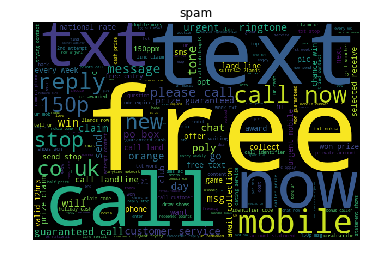

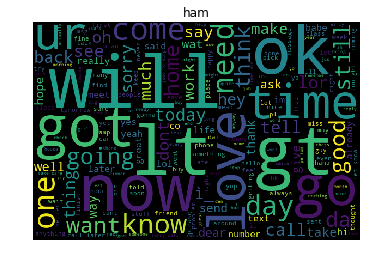

*** things that should be spam ***
XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIALE ZOUK WITH NICHOLS FROM PARIS.FREE ROSES 2 ALL LADIES !!! info: 07946746291/07880867867 
SMS. ac sun0819 posts HELLO:\You seem cool
08714712388 between 10am-7pm Cost 10p
Romantic Paris. 2 nights, 2 flights from å£79 Book now 4 next year. Call 08704439680Ts&Cs apply.
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA
More people are dogging in your area now. Call 09090204448 and join like minded guys. Why not arrange 1 yourself. There's 1 this evening. Aå£1.50 minAPN LS278BB
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!
Babe:

In [3]:

#Import all the necessary packages
from sklearn.svm import SVC
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
#This package is required to extract text related features
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

# data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
# file contains some invalid chars
#therefore set encoding as 'ISO-8859-1'
df = pd.read_csv('C:/Users/attom/SVM/spam.csv', encoding='ISO-8859-1')

# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# rename columns to something better
df.columns = ['labels', 'data']

# create binary labels
#set 'ham' as 0 and 'spam' as 1
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
#move the labels to a variable Y
Y = df['b_labels'].values

# Since the learning model does not understand text,
# Let us use Tfidf or some other tokeizer/embedding/vectorizer
# to generate realizable features
# try multiple ways of calculating features
tfidf = TfidfVectorizer(decode_error='ignore')
X = tfidf.fit_transform(df['data'])

# count_vectorizer = CountVectorizer(decode_error='ignore')
# X = count_vectorizer.fit_transform(df['data'])

# split the data
# training 2/3 and testing 1/3
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

#Use SVC with linear kernel
model = SVC(kernel='linear', C=2.)

t0 = datetime.now()
model.fit(Xtrain, Ytrain)
print("train duration:", datetime.now() - t0)
t0 = datetime.now()
print("train score:", model.score(Xtrain, Ytrain), "duration:", datetime.now() - t0)
t0 = datetime.now()
print("test score:", model.score(Xtest, Ytest), "duration:", datetime.now() - t0)



# visualize the data
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.title(label)
  plt.show()

visualize('spam')
visualize('ham')


# see what we're getting wrong
df['predictions'] = model.predict(X)

# things that should be spam
print("*** things that should be spam ***")
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

# things that should not be spam
print("*** things that should not be spam ***")
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

